In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npy

# Setze die Locale auf Deutsch
#locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')

df = pd.read_csv('../Projektdatensaetze/2021/ergebnissefahrradzaehlungen2021_REFACTORED.csv',
                 sep=';', skiprows=2)
df.drop(index=df.index[-1],axis=0,inplace=True)
df['time'] = pd.to_datetime(df['time'], dayfirst=True, format='%d. %m. %Y %H:%M')
df['days'] = df['time'].dt.date
display(df)

,time,5.01 BN - Kennedybrücke (Nordseite),5.02 BN - Kennedybrücke (Südseite) Barometer,5.03 BN - Nordbrücke (Südseite),5.04 BN - Nordbrücke (Nordseite),5.05 BN - Südbrücke (Südseite),5.06 BN - Südbrücke (Nordseite),5.07 BN - Estermannufer,5.08 BN - Von-Sandt-Ufer,5.09 BN - Rhenusallee,...,5.12 BN - Straßburger Weg,5.13 BN - Wilhelm-Spiritus-Ufer,5.14 BN - Mc Cloy Weg,5.15 BN - Weg auf Damm Neil,Kennedybrücke,Nordbrücke,Südbrücke,Summe,Unnamed: 20,days
0,2021-01-01 00:00:00,6.0,17.0,1.0,2.0,0.0,7.0,0.0,5.0,1.0,...,NaN,4.0,NaN,1.0,23.0,3.0,7.0,79.0,NaN,2021-01-01
1,2021-01-01 01:00:00,19.0,28.0,1.0,2.0,6.0,1.0,0.0,1.0,2.0,...,NaN,5.0,NaN,4.0,47.0,3.0,7.0,136.0,NaN,2021-01-01
2,2021-01-01 02:00:00,19.0,28.0,3.0,0.0,2.0,2.0,0.0,1.0,7.0,...,NaN,3.0,NaN,4.0,47.0,3.0,4.0,133.0,NaN,2021-01-01
3,2021-01-01 03:00:00,21.0,65.0,4.0,6.0,2.0,1.0,2.0,5.0,1.0,...,NaN,4.0,NaN,1.0,86.0,10.0,3.0,217.0,NaN,2021-01-01
4,2021-01-01 04:00:00,8.0,17.0,2.0,0.0,0.0,3.0,0.0,0.0,3.0,...,NaN,2.0,NaN,3.0,25.0,2.0,3.0,74.0,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2021-12-31 19:00:00,83.0,114.0,5.0,5.0,27.0,18.0,11.0,13.0,27.0,...,NaN,17.0,10.0,34.0,197.0,10.0,45.0,627.0,NaN,2021-12-31
8756,2021-12-31 20:00:00,18.0,37.0,10.0,2.0,12.0,5.0,5.0,10.0,10.0,...,NaN,9.0,30.0,12.0,55.0,12.0,17.0,249.0,NaN,2021-12-31
8757,2021-12-31 21:00:00,20.0,51.0,2.0,2.0,5.0,4.0,2.0,10.0,11.0,...,NaN,11.0,18.0,16.0,71.0,4.0,9.0,250.0,NaN,2021-12-31
8758,2021-12-31 22:00:00,10.0,29.0,0.0,1.0,6.0,5.0,0.0,5.0,3.0,...,NaN,3.0,7.0,7.0,39.0,1.0,11.0,132.0,NaN,2021-12-31


In [2]:
import matplotlib.gridspec as gridspec

def plot(header, hourly):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 
              'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'gold', 'violet', 'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 
              'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'gold', 'violet']
    
    all_dates = pd.date_range(start=df['days'].min(), end=df['days'].max())
    
    if header != 'time' and header != 'days' and header != 'Time':
        fig = plt.figure(figsize=(8, 6))
        gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # 2 Zeilen, Plot 3/4 und Tabelle 1/4

        ax = plt.subplot(gs[0])  # Plot in der oberen Zeile
        
        # Plot der Daten
        x_values_per_day = df.groupby('days')[header].sum()
        x_values_per_day = x_values_per_day.reindex(all_dates, fill_value=None)
        ax.plot(x_values_per_day, color=colors[df.columns.get_loc(header)], label='Anzahl')

        # Zellen für die Tabelle
        x_values_per_hour = df[header]
        cells_per_hour = [x_values_per_hour.mean(), x_values_per_hour.median(),
                          x_values_per_hour.std(), x_values_per_hour.min(), x_values_per_hour.max()]

        cells_per_day = [x_values_per_day.mean(), x_values_per_day.median(), 
                         x_values_per_day.std(), x_values_per_day.min(), x_values_per_day.max()]

        # Runde die Werte für die Tabelle
        cells_per_hour = [round(value, 2) for value in cells_per_hour]
        cells_per_day = [round(value, 2) for value in cells_per_day]

        # Tabellenüberschriften
        titles = ['Mittelwert', 'Median', 'Standardabw.', 'Min', 'Max']

        # Tabelle in der unteren Zeile
        ax_table = plt.subplot(gs[1])  # Leere Achse, um die Tabelle zu setzen
        ax_table.axis('off')  # Achsen ausschalten, da nur die Tabelle angezeigt wird

        # Tabelle erstellen
        table = ax_table.table(cellText=[cells_per_hour, cells_per_day], rowLabels=['pro {}'.format(hourly), 'pro Tag'],
                               colLabels=titles, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)

        # Achsentitel und Legende für den Plot
        ax.set_title(header)
        ax.set_xlabel('Tag')
        ax.set_ylabel('Überquerungen mit dem Fahrrad')
        ax.legend()

        # Plot anzeigen
        plt.tight_layout()
        plt.show()


In [3]:
import matplotlib.gridspec as gridspec

def plot_tables(columns, hourly):

    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 
                  'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'gold', 'violet', 'blue']
    
    all_dates = pd.date_range(start=df['days'].min(), end=df['days'].max())
    all_rows = []
    rows_labels = []
    fig, ax = plt.subplots()
    
    for name in columns:
        if name != 'time' and name != 'days' and name !='Time':
            x_values_per_day = df.groupby('days')[name].sum()
            x_values_per_day = x_values_per_day.reindex(all_dates, fill_value=None)
            # Zellen für die Tabelle
            x_values_per_hour = df[name]
            cells_per_hour = [x_values_per_hour.mean(), x_values_per_hour.median(),
                              x_values_per_hour.std(), x_values_per_hour.min(), x_values_per_hour.max()]
    
            cells_per_day = [x_values_per_day.mean(), x_values_per_day.median(), 
                             x_values_per_day.std(), x_values_per_day.min(), x_values_per_day.max()]
    
            # Runde die Werte für die Tabelle
            cells_per_hour = [round(value, 2) for value in cells_per_hour]
            cells_per_day = [round(value, 2) for value in cells_per_day]
            all_rows.append(cells_per_hour)
            all_rows.append(cells_per_day)
    
            rows_labels.append('{} pro {}'.format(name, hourly))
            rows_labels.append('{} pro Tag'.format(name))
    
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    # Tabellenüberschriften
    titles = ['Mittelwert', 'Median', 'Standardabw.', 'Min', 'Max']
    # Tabelle erstellen
    table =ax.table(cellText=all_rows, rowLabels=rows_labels, colLabels = titles,
                               loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)


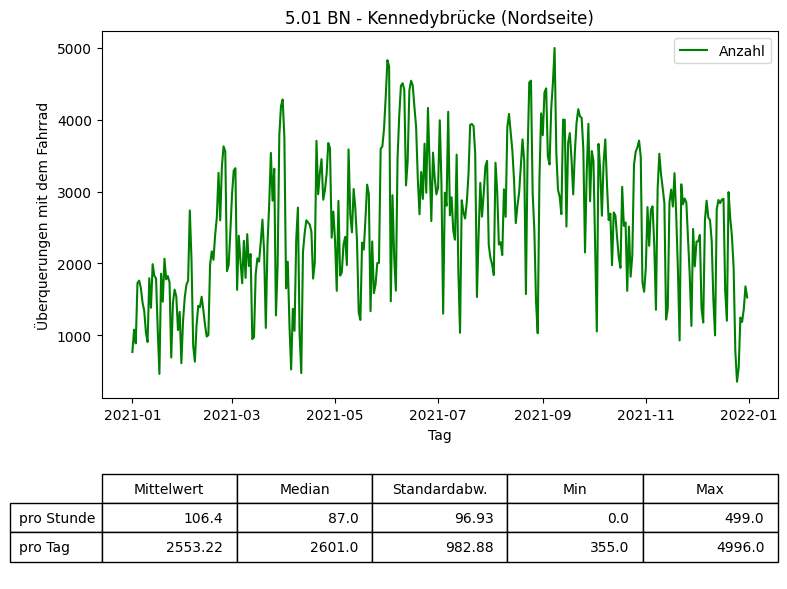

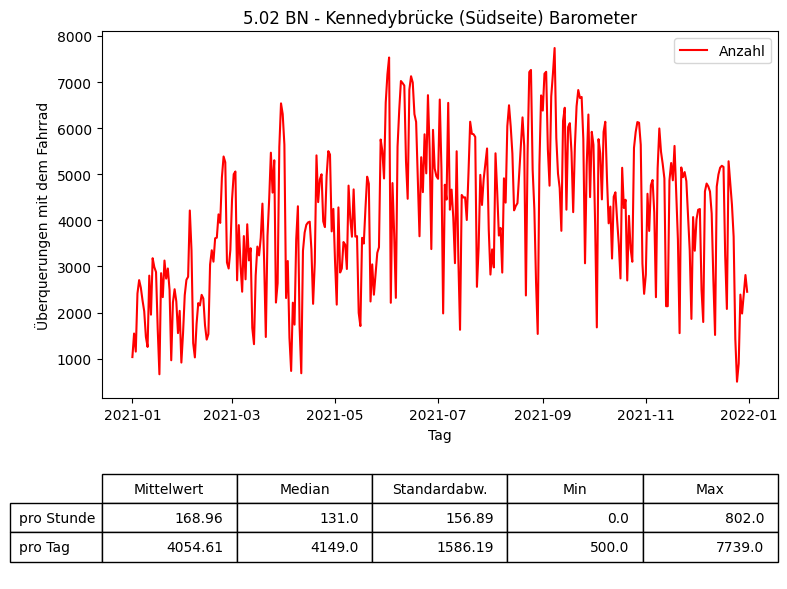

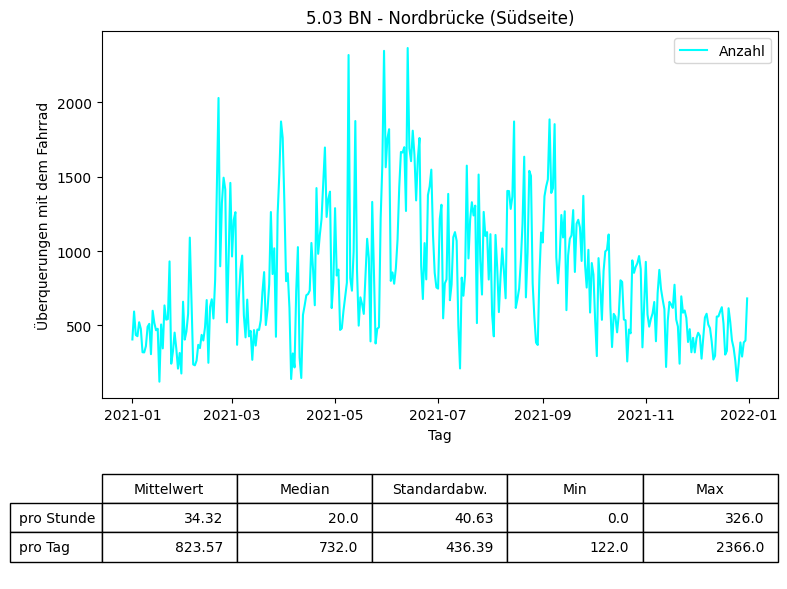

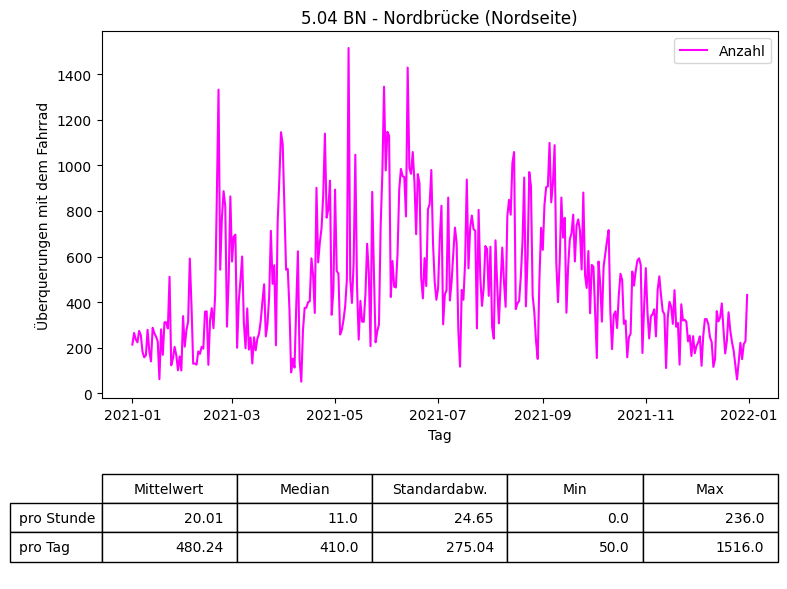

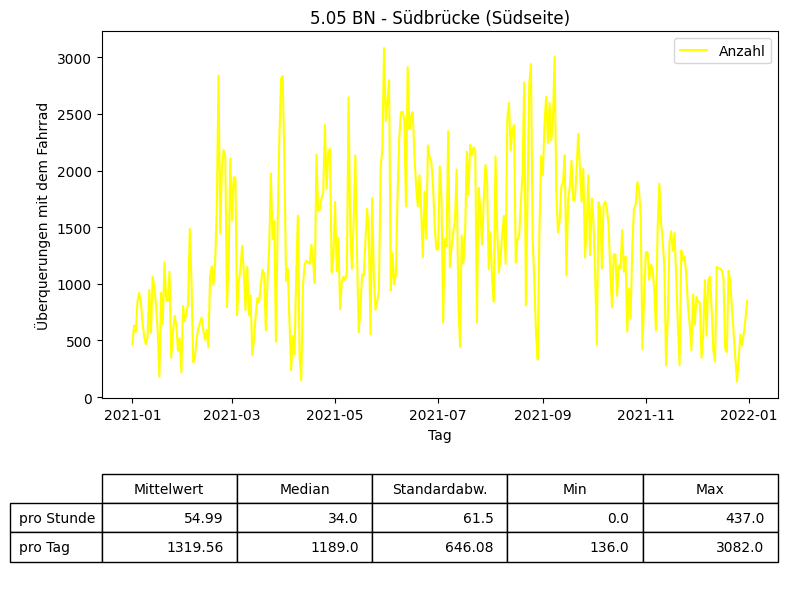

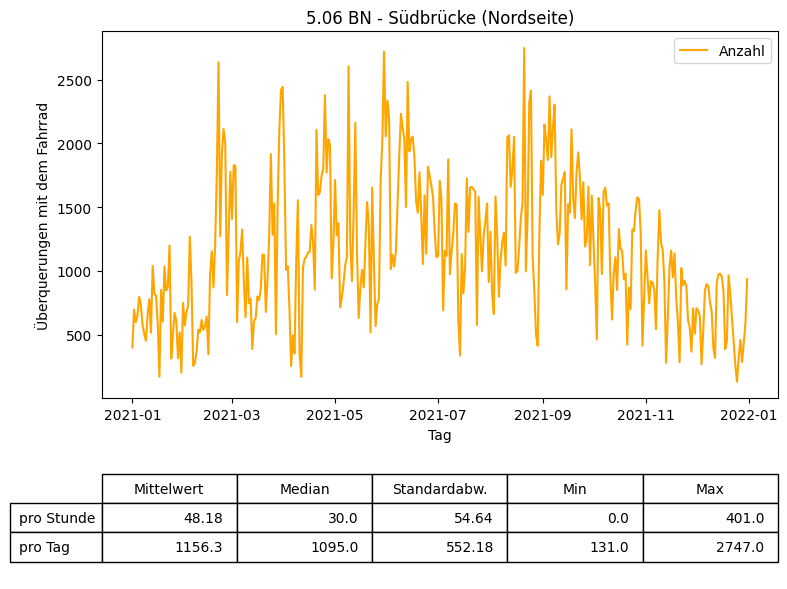

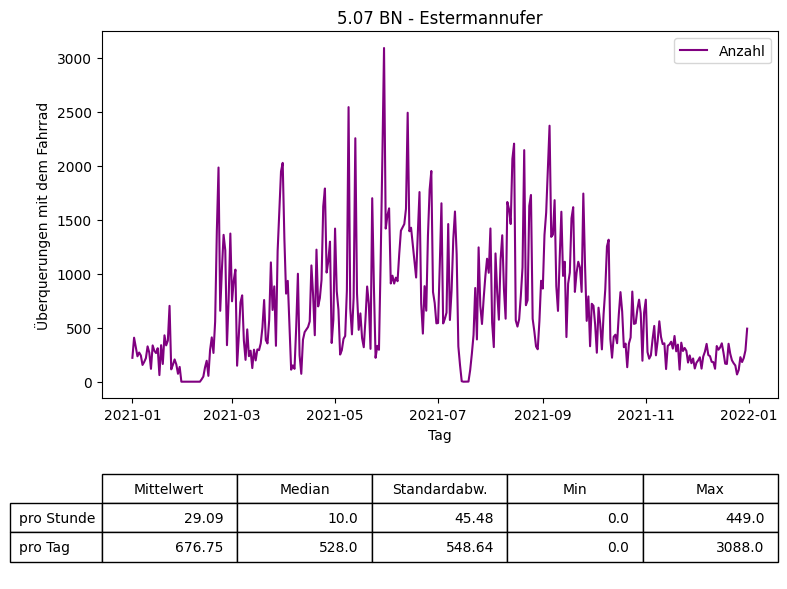

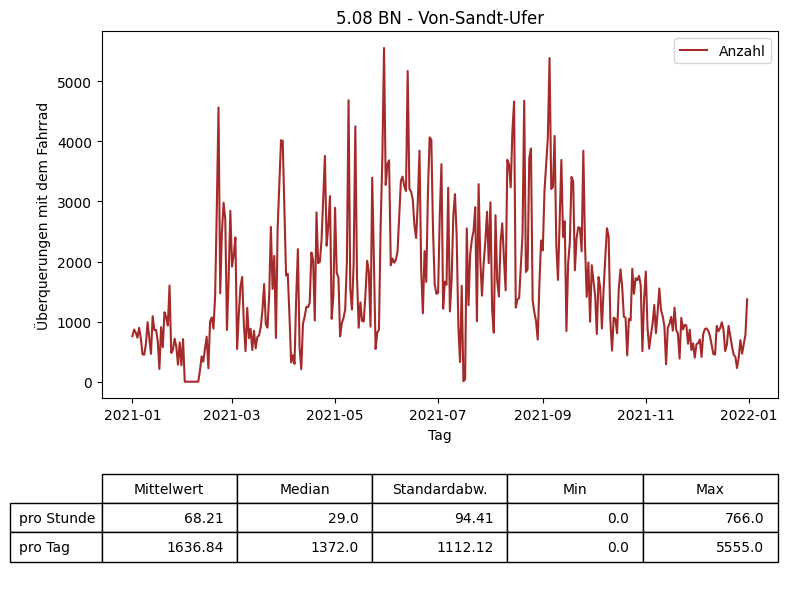

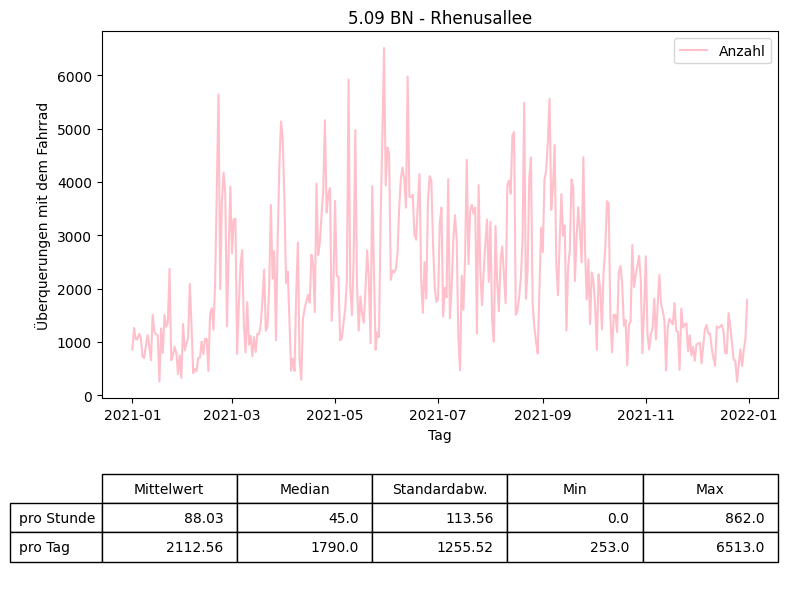

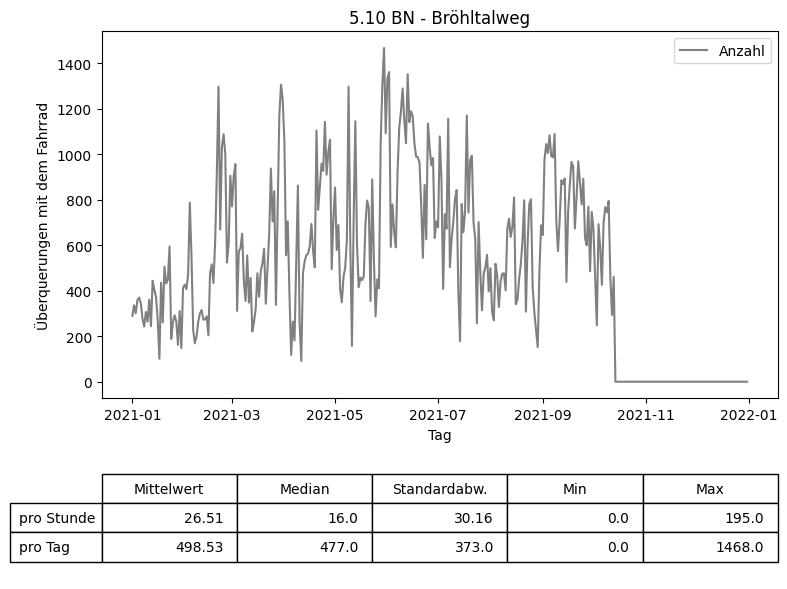

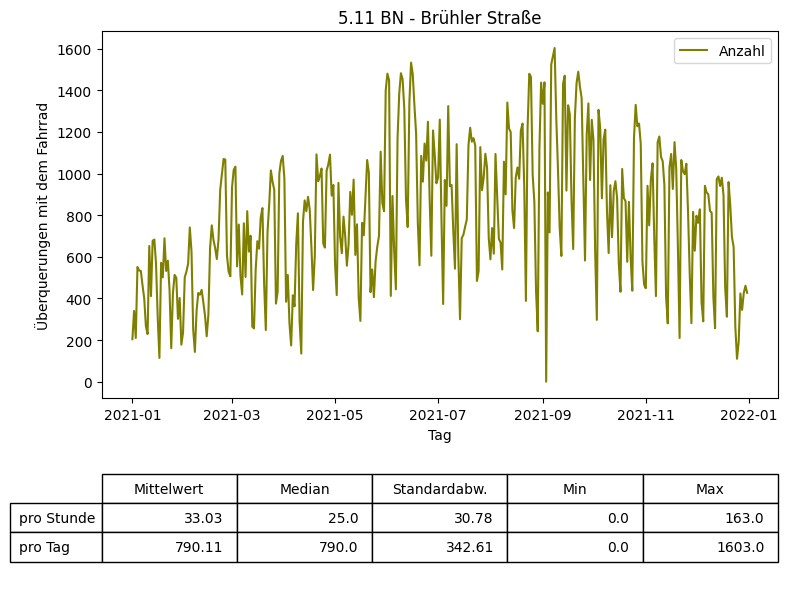

C:\Users\caddowallace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


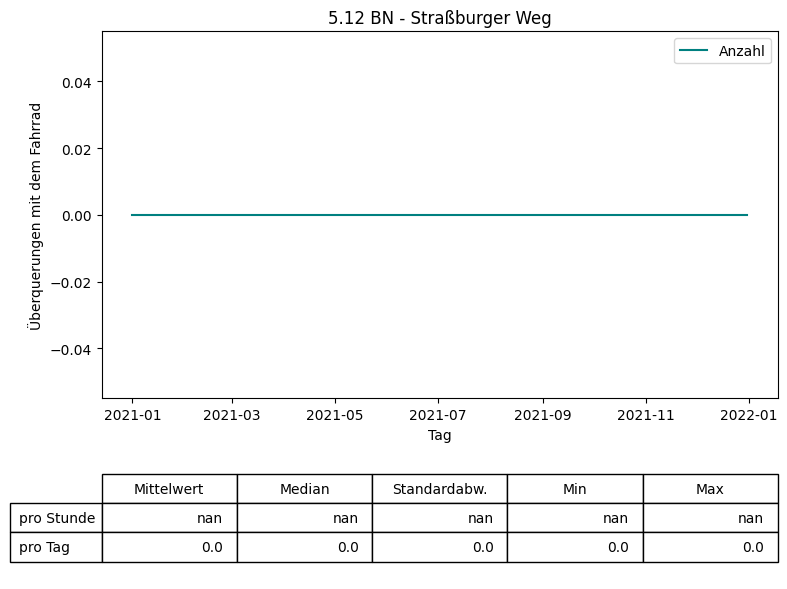

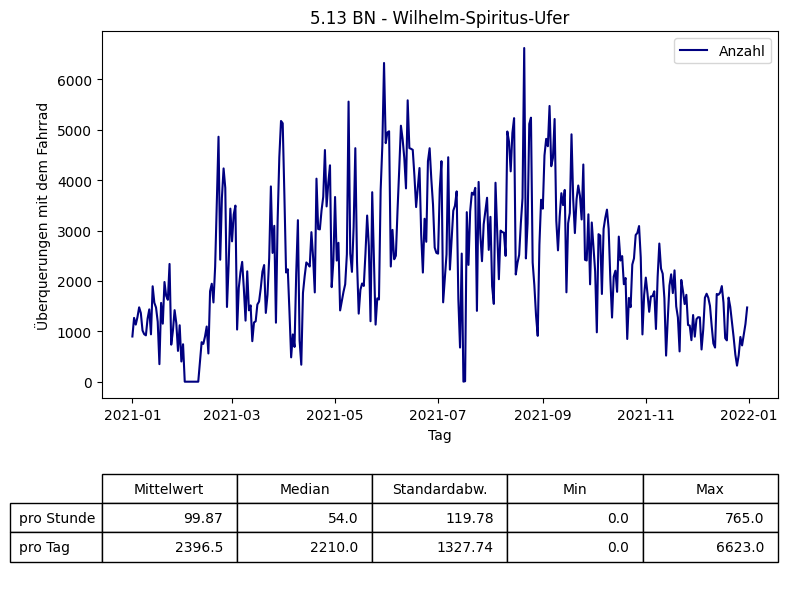

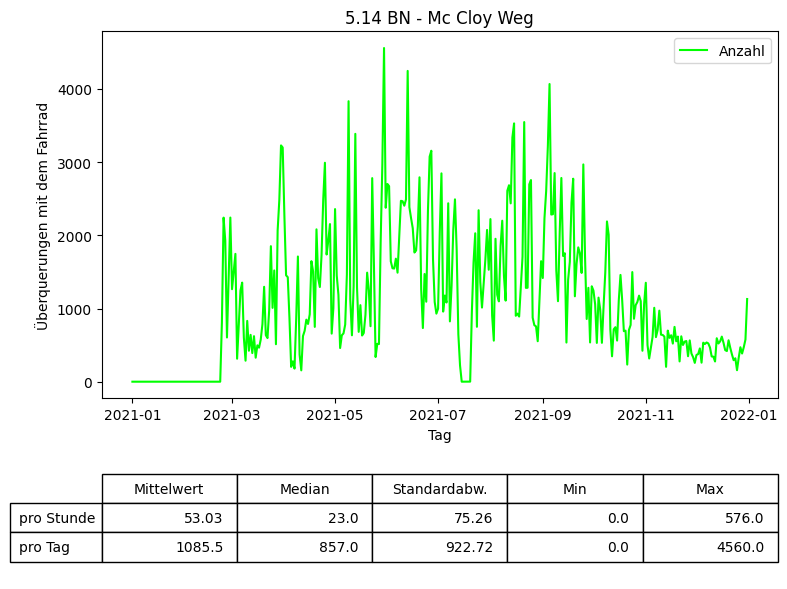

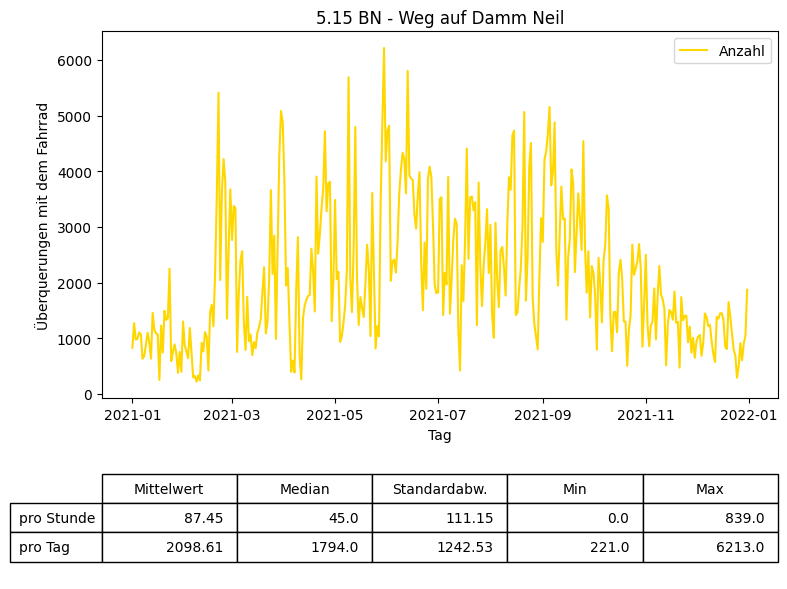

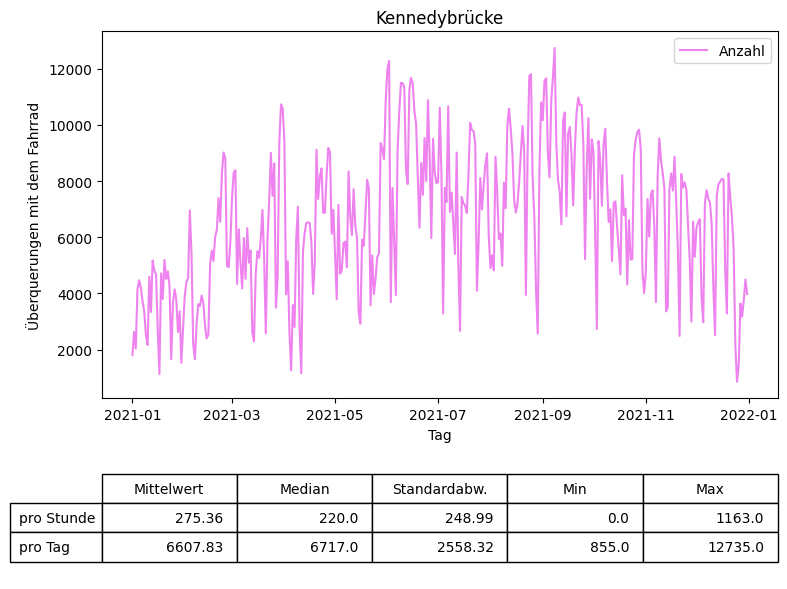

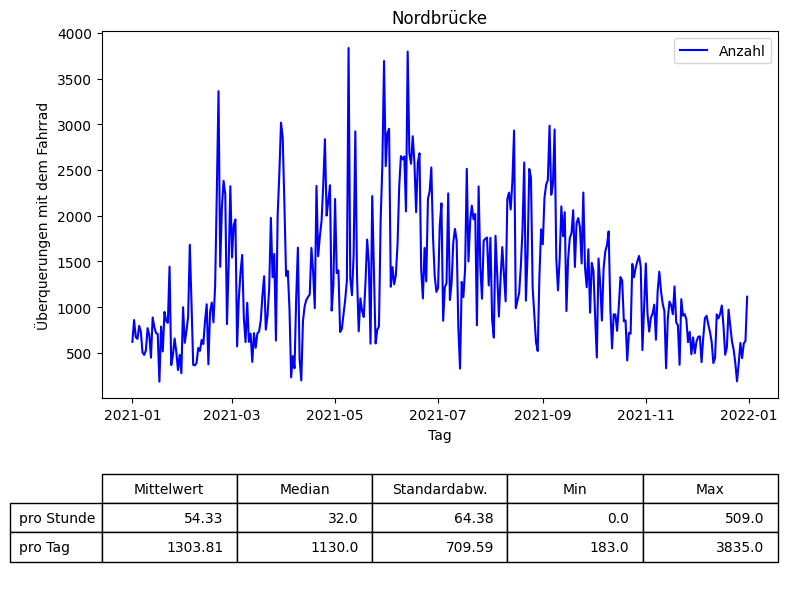

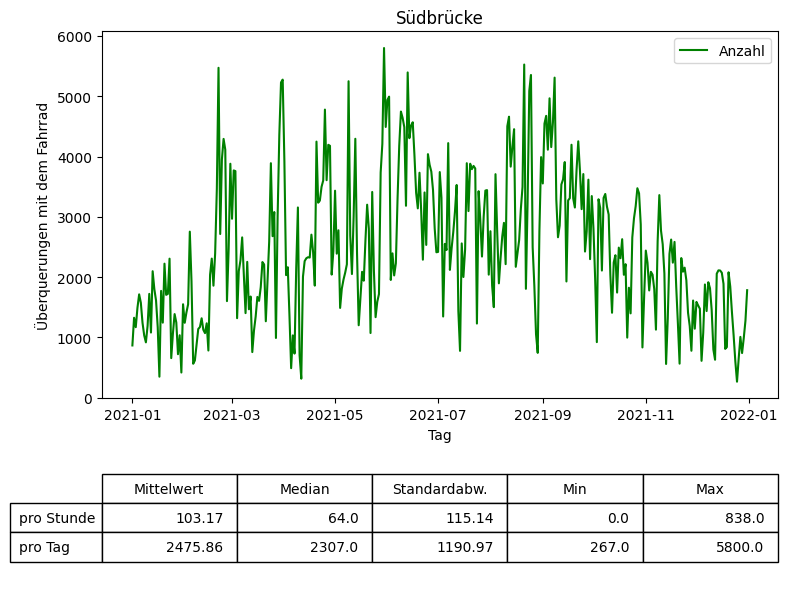

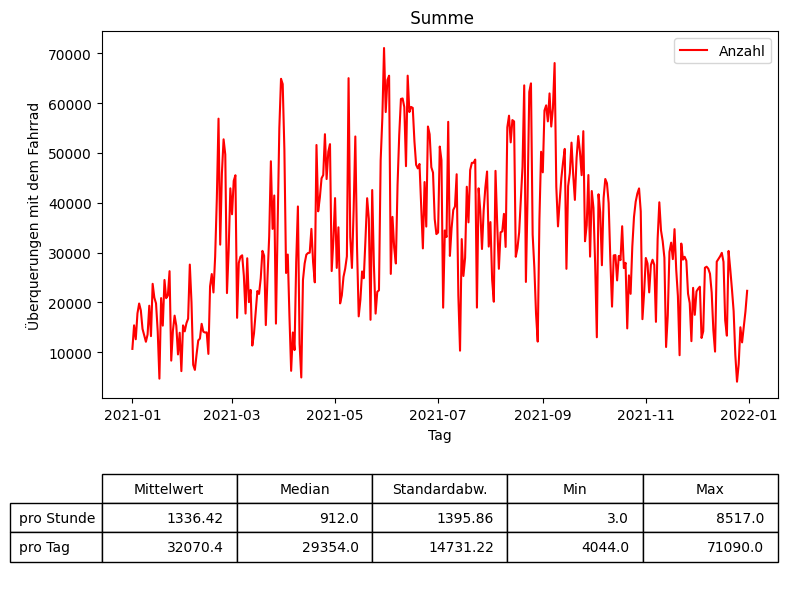

C:\Users\caddowallace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


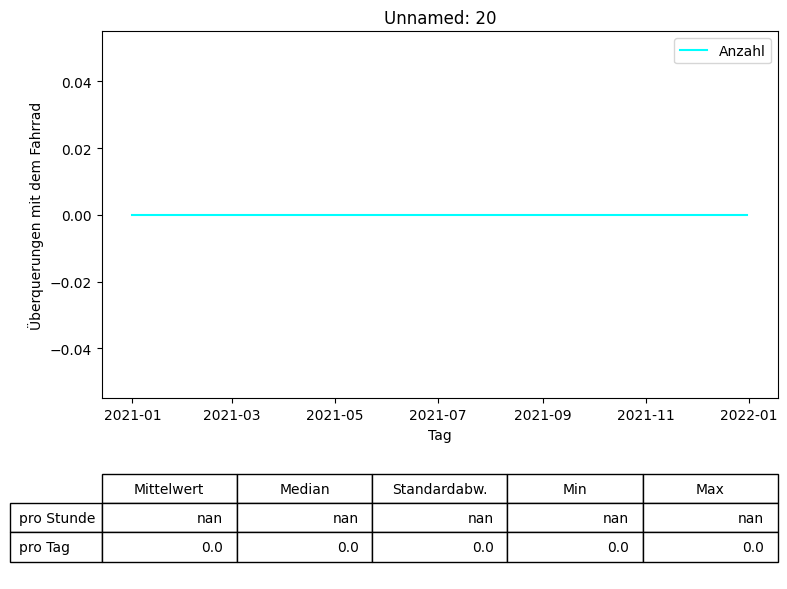

In [4]:
for name in df.columns:
   plot(name, 'Stunde')

C:\Users\caddowallace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\caddowallace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


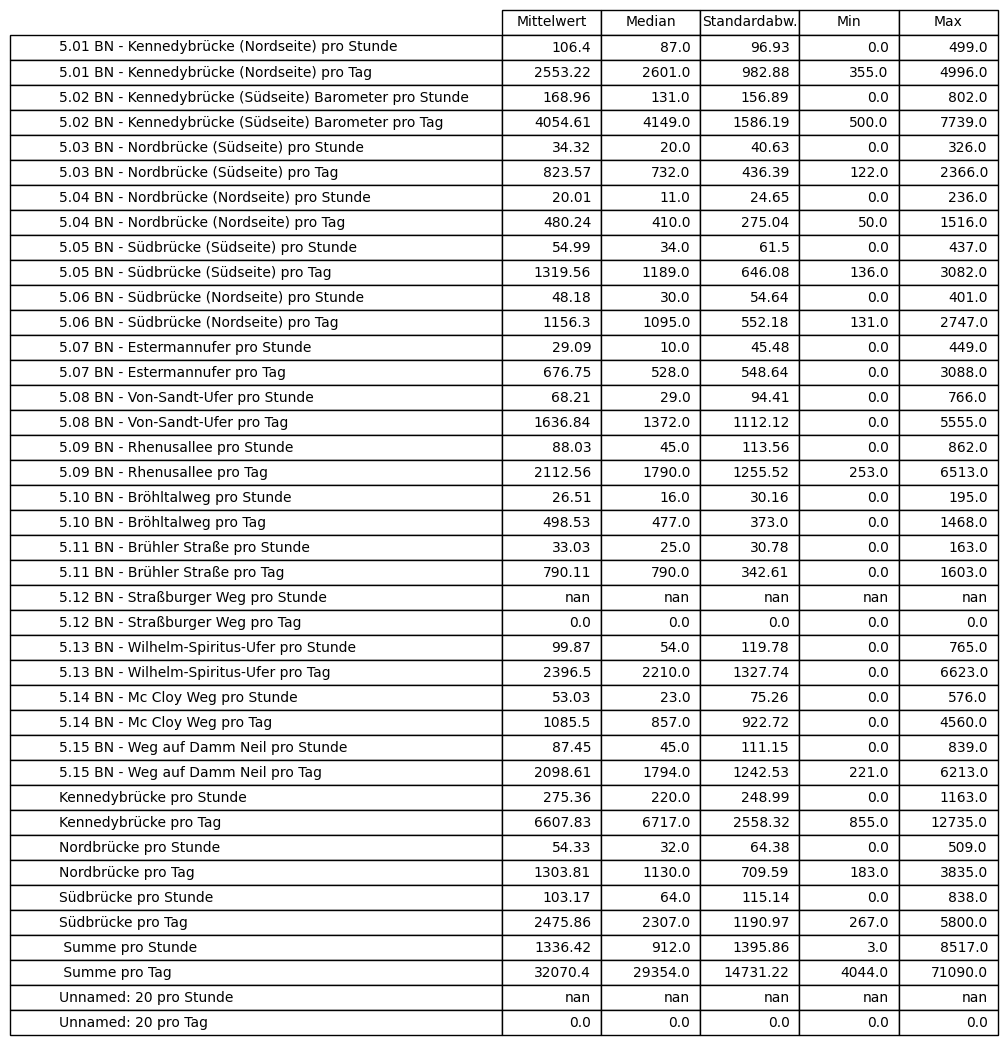

In [5]:
plot_tables(df.columns, 'Stunde')